# Task 3 : Cuisine Classification

<h3>Objective :</h3> 

- Develop a machine learning model to classify restaurants based on their cuisines.

<h3>Steps :</h3>

- Preprocess the dataset by handling missing values and encoding categorical variables.
- Split the data into training and testing sets.
- Select a classification algorithm (e.g., logistic regression, random forest) and train it on the training data. 
- Evaluate the model's performance using appropriate classification metrics (e.g., accuracy, precision, recall) on the testing data.
- Analyze the model's performance across different cuisines and identify any challenges or biases.

## Import necessary Libraries and Data Loading

In [1]:
# Import Libraries

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Ignore warnings

import warnings
warnings.filterwarnings('ignore') 


In [2]:
# Data Loading (CSV file)

dataset = pd.read_csv(r"E:\Cognify\Dataset .csv")
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Data Pre-processing

<h3>Missing Value Data Analysis

In [3]:
# Check columns of the dataframe

list(dataset.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [4]:
# Check null count and data types

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# check total null values of the data

dataset.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

    - In this dataset, 9 values ​​of the Cuisines were empty, which was removed.

In [7]:
# drop null values and restore in new dataframe

refine_data = dataset.dropna()
refine_data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
# verifying dropped data

refine_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
# Extract only the first cuisine (primary cuisine) from the list

refine_data['Primary Cuisine'] = refine_data['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Remove biased data (rare cuisines with <50 instances)

cuisine_counts = refine_data['Primary Cuisine'].value_counts()
valid_cuisines = cuisine_counts[cuisine_counts >= 50].index
refine_data = refine_data[refine_data['Primary Cuisine'].isin(valid_cuisines)].copy()
label_data = refine_data
label_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Primary Cuisine
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Japanese
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Japanese


## EDA - Exploratory Data Analysis

<h3>Statistical Data Analysis and Visual Data Analysis</h3>

In [10]:
# Descriptive Statistics

refine_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.898000e+03,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000
mean,8.912901e+06,13.316925,66.729847,26.211281,944.746347,1.752416,2.602517,145.463025
std,8.860150e+06,48.624319,36.524076,9.700238,13902.133331,0.873187,1.513356,425.971946
min,5.300000e+01,1.000000,-157.836031,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.013778e+05,1.000000,77.088471,28.487537,250.000000,1.000000,2.400000,4.000000
50%,3.600096e+06,1.000000,77.195421,28.571626,400.000000,2.000000,3.100000,27.000000
75%,1.835515e+07,1.000000,77.284557,28.642457,700.000000,2.000000,3.600000,115.000000
max,1.850065e+07,216.000000,174.832089,55.975097,800000.000000,4.000000,4.900000,10934.000000


<h3>Conclusion of Descriptive Statistics</h3>

1. Average Cost for Two : 
- There's a high variance in average cost, a mix of both budget and luxury restaurants. 
- The extreme max value of two 800,000$ could be an outlier.

2. Price Range :
- Price range scale 1 to 4
- Most frequent either 1 or 2
- Most restaurants fall between low to mid-range pricing with few high-end options.

3. Aggregate Rating :
- The average rating is below 3, suggesting that many restaurants have moderate to poor ratings.
- The presence of ratings indicates mixed customer rating.

4. Votes : 
- Most restaurants have low customer review counts, but a few have high popularity (10,934 votes). 
- The high standard deviation suggests some restaurants get significantly more attention than others.

In [11]:
# Check Unique values

unique_dict = dict()
unique_count = dict()

# create a for loop to store unique values in dictionary

for i in list(refine_data.columns):
    unique_dict.update({i : refine_data[i].unique()})
    unique_count.update({i : len(refine_data[i].unique())})

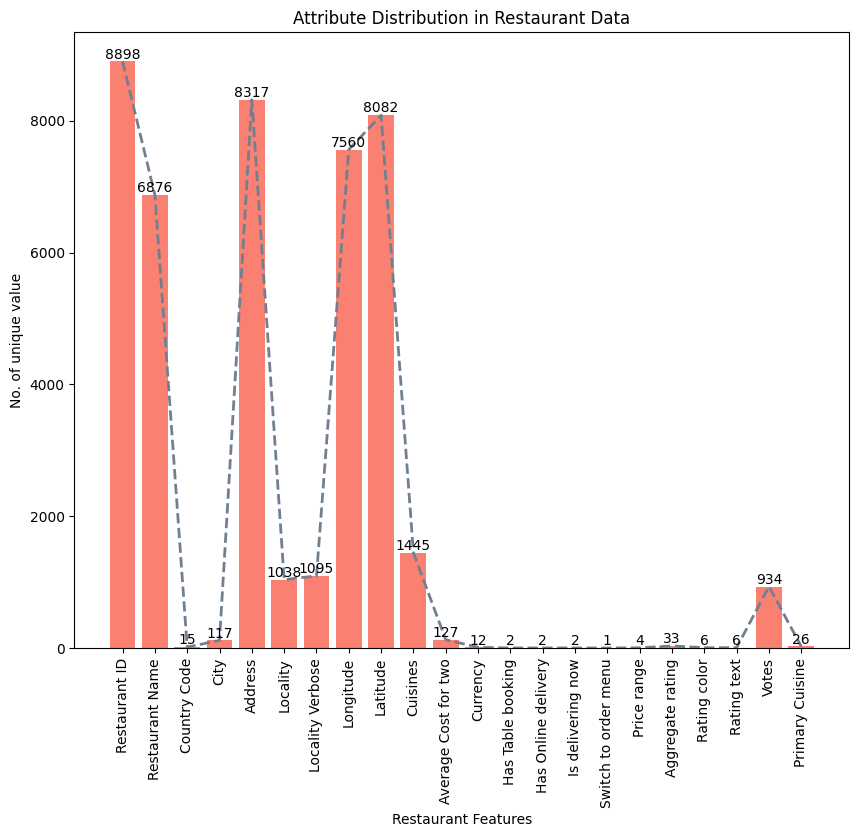

In [12]:
# Unique Value Counts Visual Analysis

plt.figure(figsize=(10,8))
plt.title(f"Attribute Distribution in Restaurant Data")
ax = plt.bar(unique_count.keys(), unique_count.values(), color = 'salmon')
plt.bar_label(ax,labels=unique_count.values())
plt.plot(list(unique_count.keys()), list(unique_count.values()), color = 'slategray', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel("Restaurant Features")
plt.ylabel("No. of unique value")
plt.show()

<h3>Graph Analysis Summary</h3>

- This bar chart visualizes the number of unique values for each feature in the restaurant dataset.

    - Restaurants span 15 different countries and cities with varity of cuisines.
    - Each restaurant has a unique identifier but some duplicates or chains.
    - Table Booking, Online Delivery indicate limited choices

## Feature Engineering

<h3>Remove Outliers</h3>

In [13]:
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 
                   'Locality Verbose', 'Longitude', 'Latitude', 
                   'Cuisines', 'Rating color', 'Rating text']

numeric_features = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

In [14]:
# Drop irrelevant columns (identifiers, location-specific)

refine_data.drop(columns=columns_to_drop, inplace=True)

In [15]:
# Dataframe for boxplot

combined_data = refine_data[numeric_features + ['Primary Cuisine']].copy()

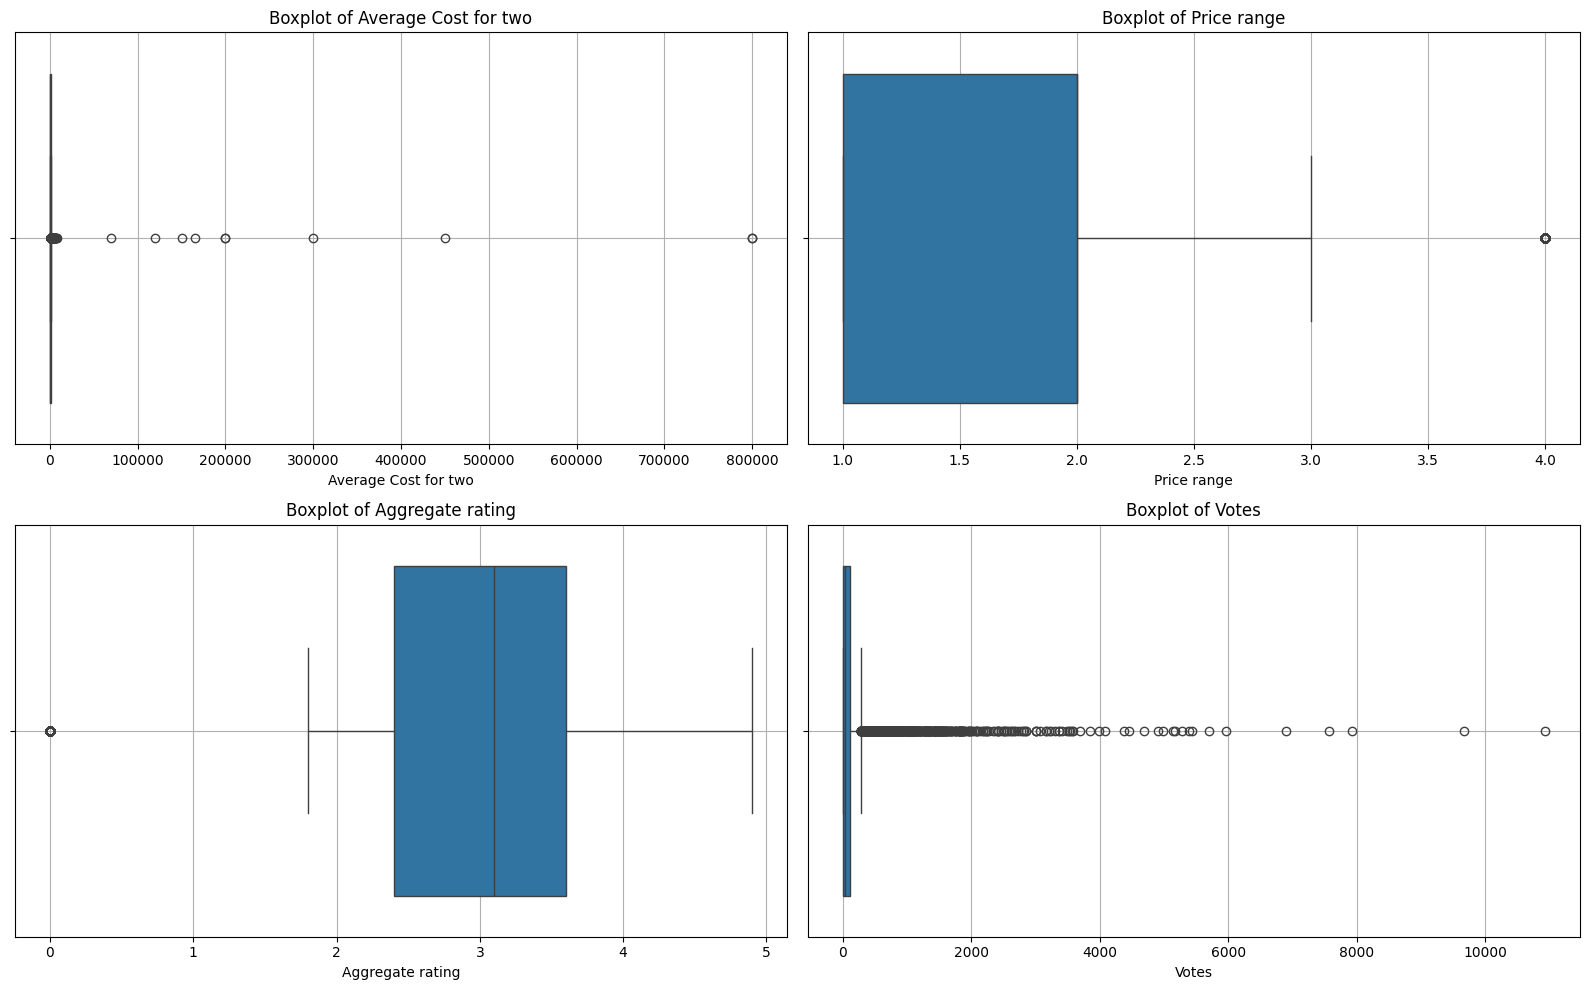

In [16]:
# Plot boxplots for outlier detection

plt.figure(figsize=(16, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=combined_data, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
# Define function to remove outliers using IQR method

def remove_outliers_iqr(refine_data, features):

    for feature in features:
        Q1 = refine_data[feature].quantile(0.25)
        Q3 = refine_data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        refine_data = refine_data[(refine_data[feature] >= lower_bound) & (refine_data[feature] <= upper_bound)]

    return refine_data

In [18]:
# Outlier removal

cleaned_data = remove_outliers_iqr(refine_data.copy(), numeric_features)

In [19]:
# Check the shape before and after

print(f"Original dataset size: {refine_data.shape}")
print(f"Cleaned dataset size: {cleaned_data.shape}")

Original dataset size: (8898, 12)
Cleaned dataset size: (7129, 12)


<h3>Data Labeling using LabelEncoder and Mapping</h3>

In [20]:
le = LabelEncoder()

In [21]:
# Labeling

refine_data['Has Table booking'] = le.fit_transform(refine_data['Has Table booking'])
refine_data['Has Online delivery'] = le.fit_transform(refine_data['Has Online delivery'])
refine_data['Is delivering now'] = le.fit_transform(refine_data['Is delivering now'])
refine_data['Switch to order menu'] = le.fit_transform(refine_data['Switch to order menu'])

# Label encode the target column

refine_data['Cuisine_Label'] = le.fit_transform(refine_data['Primary Cuisine'])

In [22]:
# One-hot encode categorical features

refine_data = pd.get_dummies(refine_data, columns=['City', 'Currency'], drop_first=True)

## Data Splitting

In [23]:
# Extract features and target - Cuisines for Classification

feature = refine_data.drop(columns=['Primary Cuisine', 'Cuisine_Label'])
target = refine_data['Cuisine_Label']


In [24]:
feature

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,City_Agra,...,Currency_Dollar($),Currency_Emirati Diram(AED),Currency_Indian Rupees(Rs.),Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL)
1,162,1200,1,0,0,0,3,4.5,591,False,...,False,False,False,False,False,False,False,False,False,False
3,162,1500,0,0,0,0,4,4.9,365,False,...,False,False,False,False,False,False,False,False,False,False
4,162,1500,1,0,0,0,4,4.8,229,False,...,False,False,False,False,False,False,False,False,False,False
5,162,1000,0,0,0,0,3,4.4,336,False,...,False,False,False,False,False,False,False,False,False,False
6,162,2000,1,0,0,0,4,4.0,520,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,208,35,0,0,0,0,2,4.5,761,False,...,False,False,False,False,False,False,False,False,False,True
9544,208,40,0,0,0,0,2,4.7,1305,False,...,False,False,False,False,False,False,False,False,False,True
9545,208,90,0,0,0,0,3,4.3,870,False,...,False,False,False,False,False,False,False,False,False,True
9548,208,170,0,0,0,0,4,3.7,661,False,...,False,False,False,False,False,False,False,False,False,True


In [25]:
target

1       17
3       17
4       17
5        7
6        1
        ..
9543     6
9544     9
9545     5
9548    16
9550     6
Name: Cuisine_Label, Length: 8898, dtype: int32

In [26]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, stratify=target, random_state=42)

In [27]:
# Print shapes of the resulting datasets

print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (6228, 136)
x_test shape: (2670, 136)
y_train shape: (6228,)
y_test shape: (2670,)


## Model Building

- We tested four different classification algorithms:

    1. Random Forest Classifier
    
    2. Logistic Regression Classifier
    3. XGBoost Classifier
    4. Support Vector Machine (SVM)

### Classification Algorithm - Random Forest

In [28]:
# Initialize the Random Forest Classifier model

random_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
# Train the Random Forest classifier

random_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test set

y_pred = random_model.predict(x_test)
y_pred

array([24, 21, 21, ..., 16, 21,  0])

In [31]:
# Print the predictions and error for verification

pred_df = pd.DataFrame(
    {'Actual Cuisines Label' : y_test,
     'Predicated Cuisines Label' : y_pred,
     'Residuals = Actual - Predicated' : y_test-y_pred}
)

pred_df.head(10)

,Actual Cuisines Label,Predicated Cuisines Label,Residuals = Actual - Predicated
3998,24,24,0
3401,11,21,-10
3506,21,21,0
2031,21,8,13
6649,24,21,3
9289,17,6,11
4577,24,21,3
3398,20,7,13
5923,24,19,5
3470,2,21,-19


- Model evaluation

    - Evaluate the performance of the trained Random Forest Classifier model using Classification Report.

In [32]:
# Print classification report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

    American       0.29      0.30      0.29        83
       Asian       0.15      0.09      0.11        23
      Bakery       0.17      0.15      0.16       186
   Beverages       0.14      0.12      0.13        24
     Biryani       0.04      0.03      0.03        34
      Burger       0.04      0.03      0.03        35
        Cafe       0.28      0.31      0.30       185
     Chinese       0.15      0.12      0.13       256
 Continental       0.08      0.06      0.07        70
    Desserts       0.05      0.02      0.03        45
    European       0.00      0.00      0.00        19
   Fast Food       0.12      0.10      0.11       202
 Finger Food       0.27      0.26      0.27        23
Healthy Food       0.17      0.06      0.09        17
   Ice Cream       0.12      0.08      0.09        53
      Indian       0.54      0.47      0.50        15
     Italian       0.17      0.11      0.14        70
   

In [33]:
# Evaluate performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nOverall Performance Metrics:\n\nAccuracy: {accuracy:.4f}\nPrecision (macro): {precision:.4f}\nRecall (macro): {recall:.4f}\nF1-score (macro): {f1:.4f}")


Overall Performance Metrics:

Accuracy: 0.3105
Precision (macro): 0.1749
Recall (macro): 0.1479
F1-score (macro): 0.1561


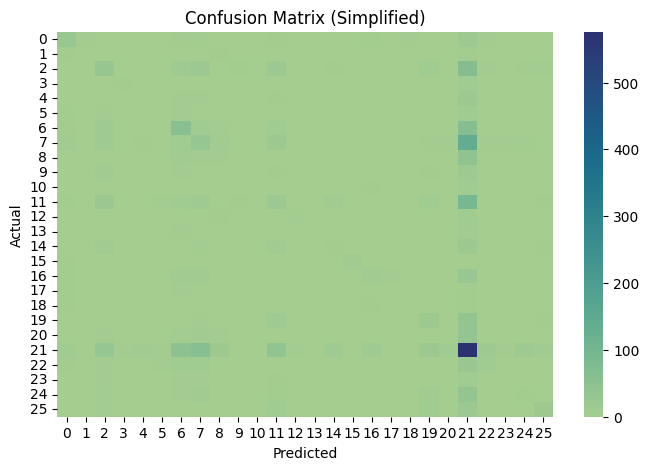

In [34]:
# Plot confusion matrix

plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(y_test, y_pred), cmap='crest', cbar=True)
plt.title("Confusion Matrix (Simplified)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h3>Conclusion :</h3>

1. Classification Report:

    - The model shows high performance for the "Indian" cuisine with a precision of 0.46 and f1-score of 0.52, indicating it's the most accurately predicted category.

2. Overall Performance Metrics:

    - These results indicate that while the model performs better than random guessing.
    - There is significant room for improvement, especially in handling class imbalance and rare cuisines.

3. Confusion Matrix:

    - The confusion matrix is heavily concentrated on a few predicted labels, especially label 21, indicating bias toward certain cuisine types.
    - This highlights an imbalance where the model tends to over-predict some labels while neglecting others, again pointing to class imbalance or model limitations.

- The model shows moderate performance overall with better results on popular or well-represented classes like "Indian" and "Cafe".

### Classification Algorithm - Logistic regression

In [35]:
# Initialize the Logistic Classifier model

log_model = LogisticRegression(max_iter=1000, multi_class='multinomial')


In [36]:
# Train the Logistic Regression Classifier

log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [37]:
# # Make predictions on the test set

y_pred_logreg = log_model.predict(x_test)
y_pred_logreg

array([21, 21, 21, ..., 21, 21, 17])

In [38]:
# Print the predictions and error for verification

log_df = pd.DataFrame(
    {'Actual Cuisines Label' : y_test,
     'Predicated Cuisines Label' : y_pred_logreg,
     'Residuals = Actual - Predicated' : y_test-y_pred_logreg}
)

log_df.head(10)

,Actual Cuisines Label,Predicated Cuisines Label,Residuals = Actual - Predicated
3998,24,21,3
3401,11,21,-10
3506,21,21,0
2031,21,21,0
6649,24,21,3
9289,17,1,16
4577,24,21,3
3398,20,21,-1
5923,24,21,3
3470,2,21,-19


- Model evaluation

    - Evaluate the performance of the trained Logistic Regression Classifier model using Classification Report.

In [39]:
# Print classification report

print("Classification Report:\n")
print(classification_report(y_test, y_pred_logreg, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

    American       0.26      0.31      0.28        83
       Asian       0.00      0.00      0.00        23
      Bakery       0.00      0.00      0.00       186
   Beverages       0.00      0.00      0.00        24
     Biryani       0.00      0.00      0.00        34
      Burger       0.00      0.00      0.00        35
        Cafe       0.00      0.00      0.00       185
     Chinese       0.00      0.00      0.00       256
 Continental       0.00      0.00      0.00        70
    Desserts       0.00      0.00      0.00        45
    European       0.00      0.00      0.00        19
   Fast Food       0.00      0.00      0.00       202
 Finger Food       0.00      0.00      0.00        23
Healthy Food       0.00      0.00      0.00        17
   Ice Cream       0.00      0.00      0.00        53
      Indian       0.07      0.20      0.11        15
     Italian       0.00      0.00      0.00        70
   

In [40]:
# Evaluate performance

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')

print(f"\nOverall Performance Metrics:\n\nAccuracy: {accuracy_logreg:.4f}\nPrecision (macro): {precision_logreg:.4f}\nrecall (macro): {recall_logreg:.4f}\nF1-score (macro): {f1_logreg:.4f}")


Overall Performance Metrics:

Accuracy: 0.3472
Precision (macro): 0.0289
recall (macro): 0.0599
F1-score (macro): 0.0373


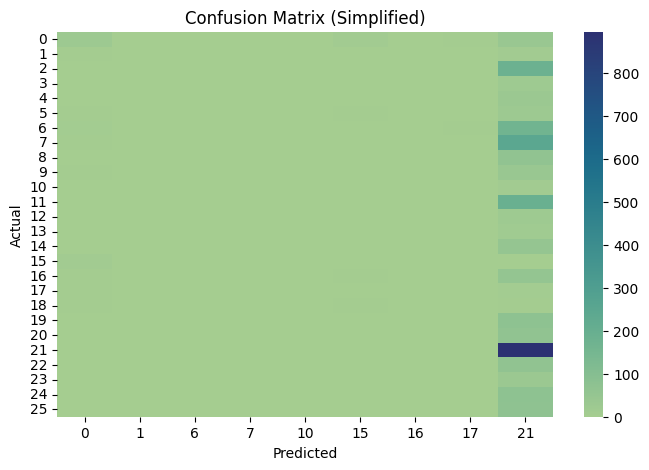

In [41]:
# Plot confusion matrix

plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_logreg), cmap='crest', cbar=True)
plt.title("Confusion Matrix (Simplified)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h3>Conclusion :</h3>

1. Overall Performance Metrics :

    - These metrics indicate poor overall performance, especially for a multi-class classification task. 
    - The model has low precision and recall across most classes.

2. Classification Report :

    - Out of 25 cuisine classes : Only the “American” cuisine has non-zero metrics.
    - All other classes have precision, recall, and F1-score = 0, meaning the model failed to correctly predict any instance from those categories.

3. Confusion Matrix :

    - Heavy concentration in predicted label 21, meaning the model frequently defaults to predicting this class.

- This pattern confirms the model is biased and lacks generalization.

### Classification Algorithm - XGBClassifier

In [42]:
# Initialize the XGB Classifier model

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [43]:
# Train the XGBoost classifier

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
# Make predictions on the test set

y_pred_xgb = xgb_model.predict(x_test)
y_pred_xgb

array([24, 21, 21, ..., 16, 21,  0], dtype=int64)

In [45]:
# Print the predictions and error for verification

xgb_df = pd.DataFrame(
    {'Actual Cuisines Label' : y_test,
     'Predicated Cuisines Label' : y_pred_xgb,
     'Residuals = Actual - Predicated' : y_test-y_pred_xgb}
)

xgb_df.head(10)

,Actual Cuisines Label,Predicated Cuisines Label,Residuals = Actual - Predicated
3998,24,24,0
3401,11,21,-10
3506,21,21,0
2031,21,7,14
6649,24,21,3
9289,17,6,11
4577,24,7,17
3398,20,7,13
5923,24,21,3
3470,2,21,-19


- Model evaluation

    - Evaluate the performance of the trained XGB Classifier model using Classification Report.

In [46]:
# Print classification report

print("Classification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

    American       0.36      0.37      0.37        83
       Asian       0.00      0.00      0.00        23
      Bakery       0.15      0.09      0.11       186
   Beverages       0.11      0.08      0.10        24
     Biryani       0.00      0.00      0.00        34
      Burger       0.00      0.00      0.00        35
        Cafe       0.32      0.29      0.30       185
     Chinese       0.18      0.06      0.09       256
 Continental       0.14      0.09      0.11        70
    Desserts       0.05      0.02      0.03        45
    European       0.00      0.00      0.00        19
   Fast Food       0.16      0.09      0.11       202
 Finger Food       0.24      0.17      0.20        23
Healthy Food       0.00      0.00      0.00        17
   Ice Cream       0.22      0.09      0.13        53
      Indian       0.47      0.47      0.47        15
     Italian       0.22      0.13      0.16        70
   

In [47]:
# Evaluate XGBoost model

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print(f"\nOverall Performance Metrics:\n\nAccuracy: {accuracy_xgb:.4f}\nPrecision (macro): {precision_xgb:.4f}\nRecall (macro): {recall_xgb:.4f}\nF1-score (macro): {f1_xgb:.4f}")



Overall Performance Metrics:

Accuracy: 0.3494
Precision (macro): 0.1785
Recall (macro): 0.1406
F1-score (macro): 0.1482


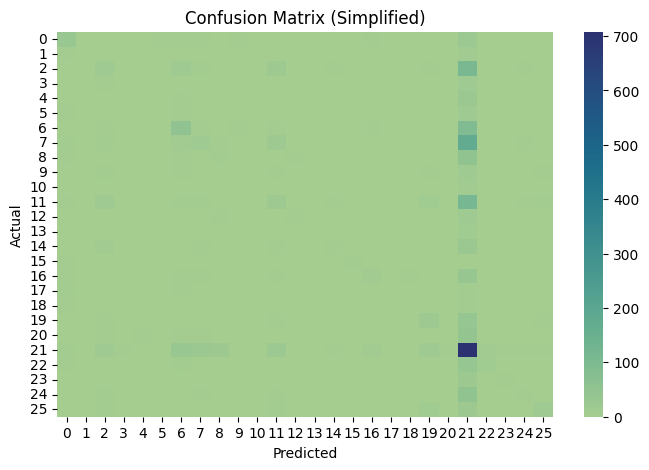

In [48]:
# Plot confusion matrix

plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_xgb), cmap='crest', cbar=True)
plt.title("Confusion Matrix (Simplified)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h3>Conclusion : </h3>

1. Overall Performance Metrics

    - These metrics show low performance overall, especially in a multi-class setting where balanced prediction across all classes is crucial.

2. Classification Report :

    - Best Performing Class: Indian (Precision/Recall/F1 = 0.47)
    - This suggests that the model is completely failing to classify certain cuisines.

3. Confusion Matrix :

    - There's a heavy concentration in predictions toward a few classes, especially around label 21.
    - Many actual classes are being misclassified into popular classes, likely due to class imbalance or dominant patterns learned by the model.

- The model is currently underperforming.

- Severe class imbalance

- Bias toward specific classes (especially label 21)

- Low precision and recall for most cuisine categories.

### Classification Algorithm - SVM

In [49]:
# Initialize the SVM Classifier model and Create a pipeline: scale features + train SVM

svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))

In [50]:
# Train the SVM Classifier

svm_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

In [51]:
# Make predictions on the test set

y_pred_svm = svm_model.predict(x_test)
y_pred_svm

array([21, 21, 21, ..., 21, 21,  0])

In [52]:
# Print the predictions and error for verification

svm_df = pd.DataFrame(
    {'Actual Cuisines Label' : y_test,
     'Predicated Cuisines Label' : y_pred_svm,
     'Residuals = Actual - Predicated' : y_test-y_pred_svm}
)

svm_df.head(10)

,Actual Cuisines Label,Predicated Cuisines Label,Residuals = Actual - Predicated
3998,24,21,3
3401,11,21,-10
3506,21,21,0
2031,21,21,0
6649,24,21,3
9289,17,6,11
4577,24,21,3
3398,20,21,-1
5923,24,21,3
3470,2,21,-19


- Model evaluation

    - Evaluate the performance of the trained SVM Classifier model using Classification Report.

In [53]:
# Print classification report

print("Classification Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

    American       0.40      0.37      0.39        83
       Asian       0.00      0.00      0.00        23
      Bakery       0.00      0.00      0.00       186
   Beverages       0.00      0.00      0.00        24
     Biryani       0.00      0.00      0.00        34
      Burger       0.00      0.00      0.00        35
        Cafe       0.31      0.11      0.17       185
     Chinese       0.00      0.00      0.00       256
 Continental       0.00      0.00      0.00        70
    Desserts       0.00      0.00      0.00        45
    European       0.00      0.00      0.00        19
   Fast Food       0.11      0.00      0.01       202
 Finger Food       0.00      0.00      0.00        23
Healthy Food       0.00      0.00      0.00        17
   Ice Cream       0.00      0.00      0.00        53
      Indian       0.38      0.60      0.46        15
     Italian       0.20      0.03      0.05        70
   

In [54]:
# Evaluate SVM

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"\nOverall Performance Metrics:\n\nAccuracy: {accuracy_svm:.4f}\nPrecision (macro): {precision_svm:.4f}\nRecall (macro): {recall_svm:.4f}\nF1-score (macro): {f1_svm:.4f}")


Overall Performance Metrics:

Accuracy: 0.3566
Precision (macro): 0.0791
Recall (macro): 0.0848
F1-score (macro): 0.0671


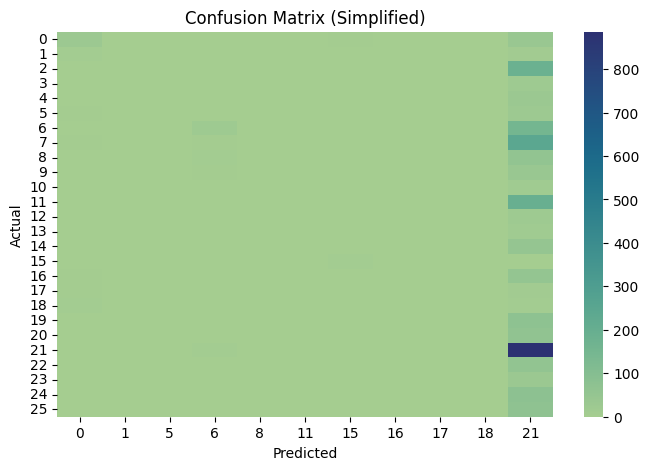

In [55]:
# Plot confusion matrix

plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_svm), cmap='crest', cbar=True)
plt.title("Confusion Matrix (Simplified)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h3>Conclusion :</h3>

1. Overall Performance Metrics

    - These macro-averaged values indicate that the model is struggling with overall class prediction, particularly with minority classes.

2. Classification Report

    - The model shows high performance for the "Indian" cuisine with a precision of 0.38 and f1-score of 0.46, indicating it's the most accurately predicted category.
    - Many classes (e.g., Asian, Biryani, Chinese, Continental, etc.) have zero precision, recall, and F1-score, indicating no correct predictions for those labels.

3. Confusion Matrix

    - A heavy concentration of predictions along one column (label 21), suggesting the model is overpredicting a specific class.
    - Most actual cuisine labels are rarely predicted correctly, reflecting a lack of generalization across classes.

- Struggles significantly with multi-class classification in this use case.

### Comparison of all Classifier

In [56]:
# Compare models
print("\n--- Final Model Comparison ---")
print(f"{'Model':<20}{'Accuracy':<10}{'Precision':<15}{'Recall':<10}{'F1-Score'}")
print(f"{'Random Forest':<20}{accuracy:.4f}    {precision:.4f}        {recall:.4f}    {f1:.4f}")
print(f"{'Logistic Regression':<20}{accuracy_logreg:.4f}    {precision_logreg:.4f}        {recall_logreg:.4f}    {f1_logreg:.4f}")
print(f"{'XGBoost':<20}{accuracy_xgb:.4f}    {precision_xgb:.4f}        {recall_xgb:.4f}    {f1_xgb:.4f}")
print(f"{'SVM':<20}{accuracy_svm:.4f}    {precision_svm:.4f}        {recall_svm:.4f}    {f1_svm:.4f}")


--- Final Model Comparison ---
Model               Accuracy  Precision      Recall    F1-Score
Random Forest       0.3105    0.1749        0.1479    0.1561
Logistic Regression 0.3472    0.0289        0.0599    0.0373
XGBoost             0.3494    0.1785        0.1406    0.1482
SVM                 0.3566    0.0791        0.0848    0.0671


<h3>Conclusion :</h3>

- XGBoost is the most effective model for this task, showing better generalization and handling of class imbalance.

- Random Forest is a solid alternative, especially if recall is more important (e.g., catching more possible cuisine types).

- SVM and Logistic Regression may require additional tuning or are not ideal in their current state.

- But It Shows signs of class imbalance, overfitting to dominant classes, or ineffective feature representation.